# **Make sure your Runtime Type is "GPU"**
Go to **Runtime>Change runtime type>Notebook settings.** Select Hardware Accelerator as GPU and Save

# **1. Clone the repository**

In [1]:
!git clone https://github.com/misbah4064/yolo-license-plate-detection.git
%cd yolo-license-plate-detection

Cloning into 'yolo-license-plate-detection'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.
/content/yolo-license-plate-detection


# **2. Download weights file**

In [2]:
!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc

Downloading...
From: https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc
To: /content/yolo-license-plate-detection/model.weights
245MB [00:02, 89.4MB/s]


# **3. Creating a function called objectDetector**

In [3]:
import cv2
import numpy as np

def objectDetector(img):
    yolo = cv2.dnn.readNet("model.weights", "darknet-yolov3.cfg")
    classes = []

    with open("classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (0,0,255)
    colorGreen = (0,255,0)
    colorWhite = (255,255,255)

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
            cv2.putText(img, label, (x, y - 30), cv2.FONT_HERSHEY_PLAIN, 3, colorWhite, 2)
    return img

# **4. Testing on Images**
Try to mount your drive and use the car images in your drive to test the performance 

In [9]:
#To mount your drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


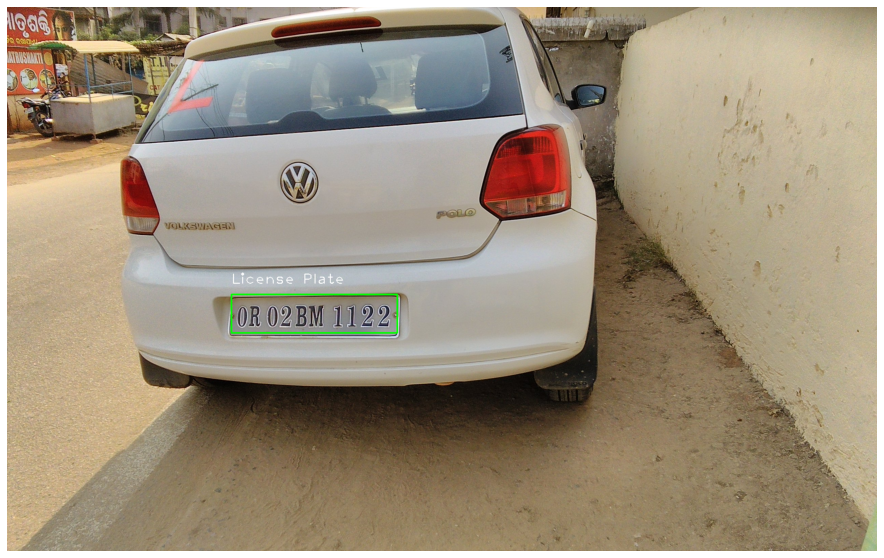

In [14]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread('/content/gdrive/MyDrive/Test-pic/dd.jpg')
pic = objectDetector(input_image)
height, width = pic.shape[:2]
resized_image = cv2.resize(pic,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
#plt.imshow('Recognized Plate',resized_image)

cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows()

# **Step 5: Testing on Videos**

In [ ]:
cap = cv2.VideoCapture("write_the_filename")
ret, frame = cap.read()
height,width,layers=frame.shape 

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
video = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height)) 
frame_counter = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    output_img = objectDetector(frame)
    video.write(output_img)

# # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
video.release()